In [ ]:
#import libraries

In [1]:
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
%matplotlib inline
import os

Using TensorFlow backend.


In [2]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
#create directory path

In [3]:
original_dataset_dir = './datasets/cats_and_dogs/train'

base_dir = './datasets/cats_and_dogs_small'

train_dir = os.path.join(base_dir,'train')

validation_dir = os.path.join(base_dir,'validation')

test_dir = os.path.join(base_dir,'test')

train_cats_dir = os.path.join(train_dir,'cats')

train_dogs_dir = os.path.join(train_dir,'dogs')

validation_cats_dir = os.path.join(validation_dir,'cats')

validation_dogs_dir = os.path.join(validation_dir,'dogs')

test_cats_dir = os.path.join(test_dir,'cats')

test_dogs_dir = os.path.join(test_dir,'dogs')

In [ ]:
#read data from directory then Switched image size to 150 * 150

In [4]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.


In [5]:
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

Found 1000 images belonging to 2 classes.


In [ ]:
#generate model
#Composite convolution layer composed of Conv2D (relu activation function) and MaxPooling2D layer.
#this is binary classification of cats and dogs, Therefore ends with dense layer with one node and sigmoid activation function.

In [6]:
from keras import layers
from keras import models


model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [7]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

In [ ]:
#complete model with loss function and optimizer

In [8]:
from keras import optimizers
model.compile(loss='binary_crossentropy',
        optimizer=optimizers.RMSprop(lr=1e-4),
        metrics=['acc'])

In [ ]:
#Steps_per_epoch: Specifies how many data to enter in one epoch (as the batch size is 20, it is set to 100 to input 2000 data). 
#Epochs is Repeat count. 

#train model then validate it

In [9]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50
)

Epoch 1/30
100/100 [==============================] - 34s 338ms/step - loss: 0.6900 - acc: 0.5385 - val_loss: 0.6529 - val_acc: 0.6170
Epoch 2/30
100/100 [==============================] - 33s 333ms/step - loss: 0.6571 - acc: 0.6180 - val_loss: 0.6133 - val_acc: 0.6170
Epoch 3/30
100/100 [==============================] - 36s 358ms/step - loss: 0.6097 - acc: 0.6670 - val_loss: 0.6780 - val_acc: 0.6770
Epoch 4/30
100/100 [==============================] - 37s 369ms/step - loss: 0.5662 - acc: 0.7070 - val_loss: 0.6714 - val_acc: 0.6850
Epoch 5/30
100/100 [==============================] - 37s 367ms/step - loss: 0.5360 - acc: 0.7240 - val_loss: 0.7657 - val_acc: 0.5570
Epoch 6/30
100/100 [==============================] - 35s 351ms/step - loss: 0.5090 - acc: 0.7435 - val_loss: 0.6447 - val_acc: 0.6700
Epoch 7/30
100/100 [==============================] - 36s 361ms/step - loss: 0.4898 - acc: 0.7605 - val_loss: 0.8054 - val_acc: 0.6150
Epoch 8/30
100/100 [==============================] - 3

In [10]:
model.save('cats_and_dogs_small_1.h5')

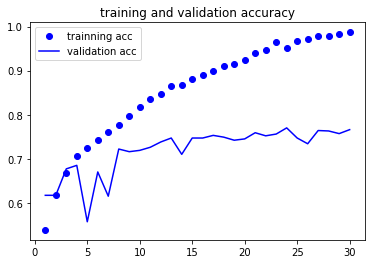

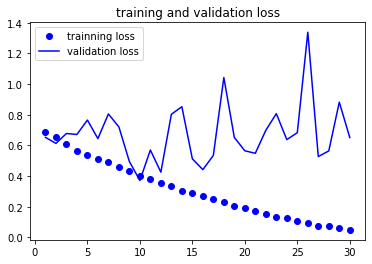

In [11]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='trainning acc')
plt.plot(epochs, val_acc, 'b', label='validation acc')
plt.title('training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='trainning loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('training and validation loss')
plt.legend()

plt.show()